Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [16]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh, label="original numkdhh")

Display the PMF.

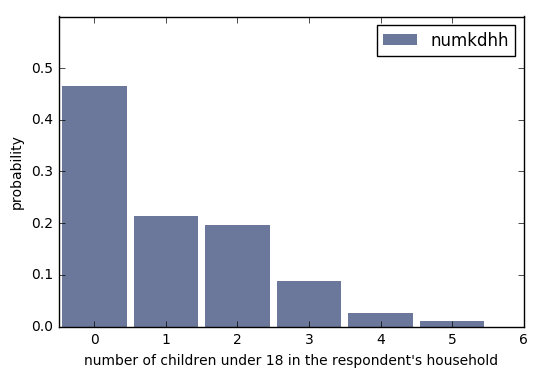

In [17]:
import thinkplot
thinkplot.Hist(pmf, label="numkdhh")
thinkplot.Show(xlabel = "number of children under 18 in the respondent's household", 
               ylabel="probability", axis=[-0.5, 6, 0, 0.6])

Define <tt>BiasPmf</tt>.

In [18]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [19]:
bias_pmf = BiasPmf(pmf, label="observed numkdhh")
bias_pmf.Total()
pmf.Total()

1.0

Display the actual Pmf and the biased Pmf on the same axes.

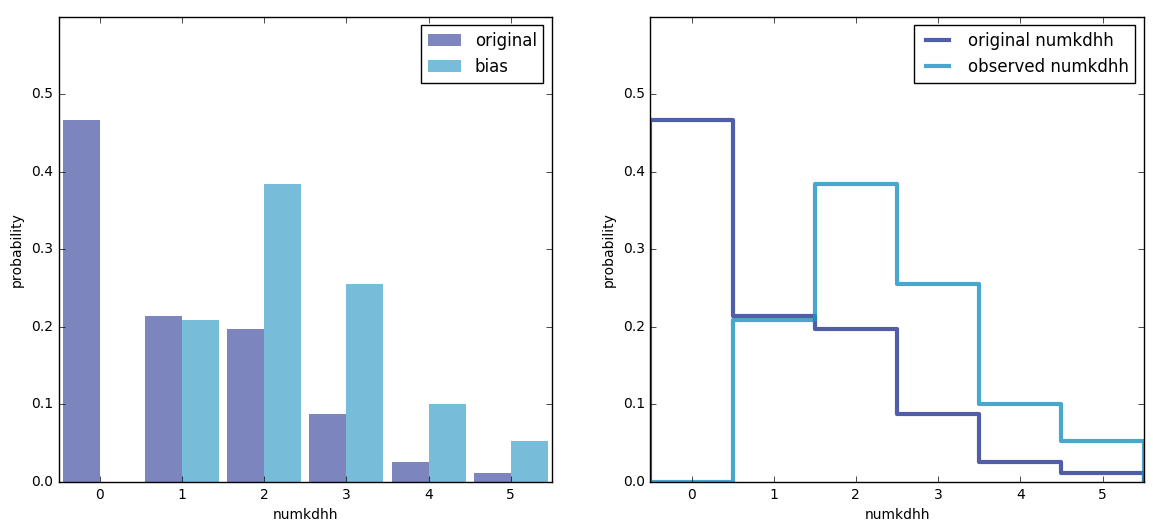

In [20]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align="right", width=width, label="original")
thinkplot.Hist(bias_pmf, align="left", width=width, label = "bias")
thinkplot.Config(xlabel='numkdhh',
                 ylabel='probability',
                 axis=[-0.5, 5.5, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, bias_pmf])
thinkplot.Show(xlabel='numkdhh',
               ylabel='probability',
               axis=[-0.5, 5.5, 0, 0.6])

Compute the means of the two Pmfs.

In [23]:
def PmfMean(pmf):
   return sum(v * p for v, p in pmf.Items())

assert PmfMean(pmf) == pmf.Mean()
assert PmfMean(bias_pmf) == bias_pmf.Mean()

print(pmf.Mean())
print(bias_pmf.Mean())

1.02420515504
2.40367910066


In [25]:
def PmfVar(pmf):
    m = PmfMean(pmf)
    return sum(p * (v - m) ** 2 for v, p in pmf.Items())

assert PmfVar(pmf) == pmf.Var()
assert PmfVar(bias_pmf) == bias_pmf.Var()

print(pmf.Var())
print(bias_pmf.Var())

1.41286432635
1.17327210551


In [26]:
pmf.Mean(), bias_pmf.Mean()

(1.0242051550438309, 2.4036791006642821)

Select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

('Mean difference between pairs', 0.15446593001841621)
('Mean difference between firsts and others', 0.07803726677754952)


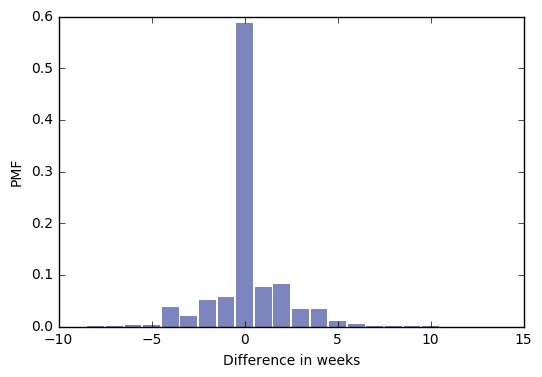

In [35]:
import first
import nsfg


def Diffs(t):
    first = t[0]
    rest = t[1:]
    diffs = [first - x for x in rest]
    return diffs

def PairWiseDifference(live):
    live = live[(live.prglngth >= 35) & (live.prglngth <= 46)]
    preg_map = nsfg.MakePregMap(live)
    diffs = []
    for caseid, indicies in preg_map.items():
        lengths = live.loc[indicies].prglngth.values
        if len(lengths) >= 2:
            diffs.extend(Diffs(lengths))
    return diffs


live, first, other = first.MakeFrames()
diffs = PairWiseDifference(live)
mean = thinkstats2.Mean(diffs)
print('Mean difference between pairs', mean)

mean_first_other = first.prglngth.mean() - other.prglngth.mean()
print('Mean difference between firsts and others', mean_first_other)

pmf = thinkstats2.Pmf(diffs)
thinkplot.Hist(pmf, align="center")
thinkplot.Show(xlabel='Difference in weeks',
               ylabel='PMF')